#### We will be training a neural network so that it can simulate a 2 input XOR gate with numpy

In [2]:
import numpy as np

#### We will first need to make the dataset. 
Make an array X having all possible inputs to an XOR gate. And a corresponding y(output) array for the input array that you just made. Remember to match the orders in the input and output array such that the output corresponding to an input have the same indexes in the arrays.

In [3]:
N, D_in, H, D_out = 4, 2, 2, 1
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 1, 1, 0]).reshape(4,1)

#### Parameters of the neural network
Now initialise the weight and bias arrays. Use numpy.random

In [9]:
w1, w2 = np.random.rand(D_in, H), np.random.rand(H,D_out)
b1, b2 = np.random.rand(H), np.random.rand(D_out)

#### Hyperparameters
1) learning rate

In [5]:
lr = 0.001

#### Declare variables for training and visualisation of loss later
1) number of iterations<br>
2) a list where we can append loss for each iteration

In [6]:
iterations = 5000
Loss = []

#### Make a function for the relu non-linearity. 
It should take an input array and return an array on which the relu non-linearity has been applied

In [7]:
def relu(input):
    return np.maximum(input, 0)

#### Train the neural network

1) First forward prop and generate an output<br>
2) Get the loss<br>
3) Backprop through the layers<br>

In [14]:
for t in range(iterations):

        #ForwardPropogation
        h=x.dot(w1) + b1
        
        a=relu(h)
        y_pred = a.dot(w2) + b2
        loss = np.square(y_pred - y).mean()
        Loss.append(loss)
        print(t,loss)


        #BackProp
        grad_y_pred = 2*(y_pred - y)
        grad_w2 = a.T.dot(grad_y_pred)
        grad_b2 = grad_y_pred
        grad_a = grad_y_pred.dot(w2.T)
        grad_h = grad_a.copy()
        grad_h[h<0] = 0
        grad_w1 = x.T.dot(grad_h)
        grad_b1 = grad_h

        w1 -= lr*grad_w1
        w2 -= lr*grad_w2
        b1 -= lr*grad_b1.mean()
        b2 -= lr*grad_b2.mean()

0 0.2533596476987933
1 0.25335715439935175
2 0.2533546640623991
3 0.2533521766829876
4 0.25334969225617987
5 0.2533472107770489
6 0.25334473224067827
7 0.25334225664216187
8 0.2533397839766041
9 0.25333731423911976
10 0.25333484742483386
11 0.2533323835288818
12 0.25332992254640935
13 0.25332746447257243
14 0.2533250093025371
15 0.2533225570314801
16 0.25332010765458773
17 0.253317661167057
18 0.2533152175640947
19 0.2533127768409179
20 0.2533103389927538
21 0.2533079040148394
22 0.25330547190242214
23 0.25330304265075915
24 0.2533006162551176
25 0.2532981927107747
26 0.2532957720130177
27 0.2532933541571435
28 0.2532909391384589
29 0.2532885269522809
30 0.253286117593936
31 0.2532837110587606
32 0.2532813073421009
33 0.253278906439313
34 0.25327650834576243
35 0.2532741130568248
36 0.253271720567885
37 0.25326933087433795
38 0.25326694397158794
39 0.25326455985504914
40 0.253262178520145
41 0.25325979996230885
42 0.2532574241769833
43 0.25325505115962066
44 0.25325268090568265
45 0.25

700 0.2521342009974476
701 0.2521329818737443
702 0.25213176382649366
703 0.2521305468543469
704 0.252129330955957
705 0.25212811612997943
706 0.25212690237507185
707 0.25212568968989385
708 0.2521244780731074
709 0.2521232675233766
710 0.2521220580393677
711 0.2521208496197491
712 0.2521196422631915
713 0.2521184359683675
714 0.25211723073395204
715 0.252116026558622
716 0.2521148234410566
717 0.25211362137993737
718 0.25211242037394754
719 0.2521112204217727
720 0.2521100215221005
721 0.2521088236736208
722 0.2521076268750256
723 0.25210643112500875
724 0.25210523642226657
725 0.25210404276549725
726 0.2521028501534011
727 0.25210165858468053
728 0.2521004680580402
729 0.2520992785721867
730 0.2520980901258287
731 0.2520969027176769
732 0.2520957163464443
733 0.2520945310108458
734 0.25209334670959826
735 0.25209216344142094
736 0.25209098120503487
737 0.2520897999991632
738 0.25208861982253117
739 0.2520874406738661
740 0.25208626255189726
741 0.252085085455356
742 0.252083909382975

In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

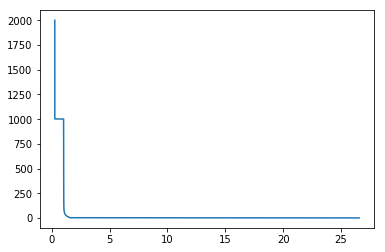

In [17]:
plt.plot(Loss, np.arange(1, len(Loss)+1))